In [1]:
import tensorflow as tf
from PIL import Image
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt

In [2]:
model = tf.keras.models.load_model("./models/single_rgb_image_regression_V02_epochs_50_1653373797")

In [3]:
FILE_PATH = "D:\\Main\\MA_PROGR\\Data\\Test\\LED_Wand_water"
BUCKET_SIZE = 60


In [4]:
images = []
for file in os.listdir(FILE_PATH):
    images.append( cv2.imread("{}/{}".format(FILE_PATH, file)))

In [5]:
# image = cv2.imread("D:\\Main\\MA_PROGR\\Data\\number_grid.jpg")


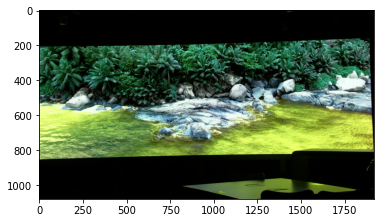

In [6]:
img = images[0]
# img = image
plt.imshow(img)

In [7]:
size_y = img.shape[0]
size_x = img.shape[1]
# size_y = image.shape[0]
# size_x = image.shape[1]

steps_horizontal = int(size_x/BUCKET_SIZE)
steps_vertikal = int(size_y/BUCKET_SIZE)

In [8]:
# steps_horizontal = 4
# steps_vertikal = 3
# start_idx = 0
# len_subset = 8
# end_idx = start_idx + len_subset

# y_start = 1
# x_start = 2


# for bucket_idx in range(start_idx, end_idx, 1):
#     x = bucket_idx % steps_horizontal
#     y = int((bucket_idx / steps_horizontal))
#     print(f"y_start: {y}, x_start: {x}")


In [9]:
# a = [[[1,2,3],[2,2,3]],[[3,3,3],[4,3,3]]]

# arr = np.asarray(a)
# arr.shape

In [10]:
# Loop through image, feed multiple buckets in model, sort results in 2D Array

img_puzz = np.full((steps_vertikal, steps_horizontal, BUCKET_SIZE, BUCKET_SIZE, 3), 0).tolist()

MAX_NUMBER_OF_BUCKETS_IN_BATCH = 20

start_idx = 0


def sort_into_alias_values(subset_of_alias_values, alias_values):

    subset_of_alias_values = np.asarray(subset_of_alias_values)
    global start_idx

    counter = 0

    len_subset = len(subset_of_alias_values)
    end_idx = start_idx + len_subset
    # subset_of_alias_values = subset_of_alias_values.reshape(len_subset, BUCKET_SIZE, BUCKET_SIZE, 3)

    for bucket_idx in range(start_idx, end_idx, 1):
        x = bucket_idx % steps_horizontal
        y = int((bucket_idx / steps_horizontal))

        

        alias_values[y][x] = subset_of_alias_values[counter]
        # img_puzz[y][x] = subset_of_alias_values[counter]
        # print(f"subset_of_alias_values[counter]: {subset_of_alias_values[counter]}")
        counter += 1

    start_idx += len_subset




def loop_through_image(img, alias_values):
    bucket_batch = []
    bucket_counter = 0
    subset_of_alias_values = 0
    sort_into_alias_values_was_called = False

    for y in range(int(steps_vertikal)):
        for x in range(int(steps_horizontal)):
            bucket = img[y*BUCKET_SIZE:(y+1)*BUCKET_SIZE, x *
                         BUCKET_SIZE:(x+1)*BUCKET_SIZE]

            # print(f"bucket.shape: {bucket.shape}")
            bucket_batch.append(bucket.reshape(
                1, BUCKET_SIZE, BUCKET_SIZE, 3))

            bucket_counter += 1

            if bucket_counter == MAX_NUMBER_OF_BUCKETS_IN_BATCH:

                bucket_batch = np.array(bucket_batch)
                bucket_batch = bucket_batch.reshape(bucket_counter, 60, 60, 3)
                subset_of_alias_values = model.predict(bucket_batch)
                print(f"subset of alias values: {subset_of_alias_values}")
                # subset_of_alias_values = bucket_batch
                sort_into_alias_values(subset_of_alias_values, alias_values)
                sort_into_alias_values_was_called = True
                bucket_counter = 0
                bucket_batch = bucket_batch.tolist()
                del bucket_batch[:]

    if not sort_into_alias_values_was_called:
        subset_of_alias_values = model.predict(bucket_batch)
        # subset_of_alias_values = bucket_batch
        sort_into_alias_values(subset_of_alias_values)



    return alias_values
    # ??


# loop_through_image(image)

# # Kontrolle, ob das Bild in der richtigen Reihenfolge wieder zusammengesetzt wird
# for y in range(steps_vertikal):
#     for x in range(steps_vertikal):
#         plt.imshow(img_puzz[y][x])
#         plt.show()

In [11]:
def create_tile(bucket_size, alias_value):
    myArray = np.zeros((BUCKET_SIZE, BUCKET_SIZE))
    for y in range(bucket_size):
        for x in range(bucket_size):
            myArray[y][x] = alias_value

    return myArray



In [12]:
def create_grayscale_img(img):

    global start_idx
    horizontal_stripes = []
    horizontal_result = 0
    final_result = 0

    alias_values = np.full((steps_vertikal, steps_horizontal), 0).tolist()
    alias_values = loop_through_image(img, alias_values)
    start_idx = 0

    # print(f"alias_values: {np.array(alias_values).shape}")

    for y in range(int(steps_vertikal)):
        for x in range(int(steps_horizontal)):
            # print("x: {}".format(x))
            if x == 0:
                horizontal_result = create_tile(BUCKET_SIZE, alias_values[y][x])
                plt.imshow(horizontal_result)
                continue
            horizontal_result = np.concatenate(
                (horizontal_result, create_tile(BUCKET_SIZE, alias_values[y][x])), axis=1)
        if y == 0:
            final_result = horizontal_result
            continue
        final_result = np.concatenate((final_result, horizontal_result))
        horizontal_result = 0

    return final_result

    # plt.imshow(final_result, cmap="gray")
    # plt.show()




subset of alias values: [[ 2.5884044]
 [ 3.5785003]
 [ 9.275381 ]
 [20.320894 ]
 [ 3.1949906]
 [ 2.6784391]
 [ 2.769196 ]
 [ 2.9826026]
 [ 2.1859663]
 [ 3.9392996]
 [ 2.5403845]
 [ 4.312904 ]
 [ 3.957674 ]
 [ 4.0014014]
 [ 3.867612 ]
 [ 3.6357455]
 [ 4.14995  ]
 [ 3.3907702]
 [ 3.6184967]
 [ 2.994202 ]]
subset of alias values: [[ 3.5065947]
 [ 2.7979677]
 [ 2.9517164]
 [ 9.097564 ]
 [25.31463  ]
 [ 3.6772509]
 [ 3.2300308]
 [ 3.3715618]
 [ 4.141029 ]
 [ 2.8644805]
 [ 3.1080508]
 [ 2.9557073]
 [ 2.5499382]
 [ 3.2577975]
 [74.23926  ]
 [ 2.8079534]
 [ 3.069744 ]
 [ 3.158792 ]
 [ 2.9907415]
 [ 3.1548126]]
subset of alias values: [[3.0718384]
 [3.483032 ]
 [3.8063502]
 [3.2584445]
 [3.7459202]
 [4.2112484]
 [3.8709562]
 [3.5415158]
 [3.5750284]
 [4.156226 ]
 [3.2714996]
 [3.4187334]
 [3.1005187]
 [3.885725 ]
 [3.2478378]
 [8.523792 ]
 [3.9747462]
 [3.2710643]
 [3.8395724]
 [3.4519227]]
subset of alias values: [[8.743218 ]
 [3.3714693]
 [3.137353 ]
 [3.070366 ]
 [3.6217191]
 [3.4581544]
 [6

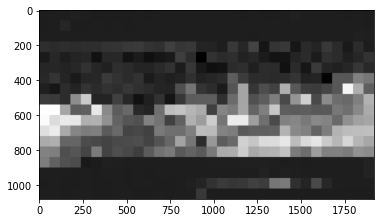

subset of alias values: [[ 2.2151322]
 [ 2.9154506]
 [ 8.302113 ]
 [18.389942 ]
 [ 2.6048474]
 [ 2.5076332]
 [ 2.9571605]
 [ 3.009537 ]
 [ 3.0419502]
 [ 2.8748343]
 [ 3.5813973]
 [ 3.3540063]
 [ 2.8170936]
 [ 3.4683063]
 [ 2.838944 ]
 [ 2.9253926]
 [ 2.4054842]
 [ 2.637218 ]
 [ 3.1740189]
 [ 2.7216964]]
subset of alias values: [[ 3.221697 ]
 [ 2.5051634]
 [ 2.891934 ]
 [ 7.9433346]
 [25.006027 ]
 [ 2.541486 ]
 [ 2.8340344]
 [ 3.1354122]
 [ 3.2563674]
 [ 2.5116794]
 [ 2.4636934]
 [ 1.9865822]
 [ 2.3196332]
 [ 2.7746084]
 [74.510414 ]
 [ 2.8538685]
 [ 2.3302665]
 [ 2.906851 ]
 [ 2.0567076]
 [ 2.434772 ]]
subset of alias values: [[3.1564777]
 [3.080569 ]
 [3.2885704]
 [2.8546991]
 [3.058448 ]
 [4.021939 ]
 [3.1844034]
 [3.9551272]
 [3.347327 ]
 [3.1179378]
 [2.8026133]
 [2.4918885]
 [3.230616 ]
 [2.359816 ]
 [3.4022074]
 [8.726067 ]
 [3.0430934]
 [2.9878426]
 [2.7299314]
 [2.641479 ]]
subset of alias values: [[9.248135 ]
 [3.2730484]
 [2.9079523]
 [2.3266323]
 [2.8106587]
 [3.0993152]
 [5

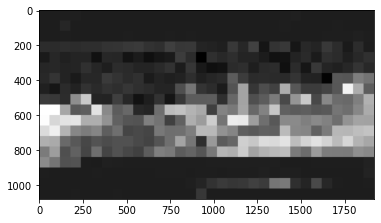

subset of alias values: [[ 2.1813827]
 [ 2.7947214]
 [ 9.010768 ]
 [18.513954 ]
 [ 3.3016777]
 [ 2.0934129]
 [ 2.581988 ]
 [ 2.7327766]
 [ 2.3777008]
 [ 2.115229 ]
 [ 2.3498585]
 [ 3.1952684]
 [ 3.5410473]
 [ 3.6184878]
 [ 2.3889174]
 [ 2.8543253]
 [ 3.0955505]
 [ 2.8937583]
 [ 3.0933938]
 [ 2.781669 ]]
subset of alias values: [[ 2.8718855]
 [ 2.6741133]
 [ 3.0284715]
 [ 7.4889245]
 [25.125511 ]
 [ 2.390636 ]
 [ 2.9976301]
 [ 2.6273575]
 [ 2.644618 ]
 [ 2.7014585]
 [ 2.5599833]
 [ 2.5694127]
 [ 3.0468967]
 [ 3.3136399]
 [73.04852  ]
 [ 2.8527553]
 [ 3.3771474]
 [ 2.8896098]
 [ 3.0628357]
 [ 3.1245434]]
subset of alias values: [[3.5347347]
 [2.7811418]
 [3.566549 ]
 [3.139591 ]
 [3.7358809]
 [3.7369266]
 [3.5455618]
 [3.542119 ]
 [3.3330095]
 [3.4064436]
 [3.4651544]
 [3.3350408]
 [3.484663 ]
 [3.525146 ]
 [3.2301154]
 [8.934064 ]
 [3.7519772]
 [3.6665158]
 [3.5375524]
 [3.8284621]]
subset of alias values: [[10.769214 ]
 [ 2.765173 ]
 [ 2.884576 ]
 [ 2.8810797]
 [ 3.1821613]
 [ 3.150534

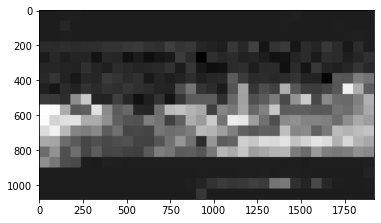

subset of alias values: [[ 2.4450097]
 [ 2.7218893]
 [ 9.061729 ]
 [19.360823 ]
 [ 2.153223 ]
 [ 2.781308 ]
 [ 2.5478108]
 [ 2.1394987]
 [ 2.9226193]
 [ 3.061891 ]
 [ 2.4409983]
 [ 2.9693944]
 [ 2.169959 ]
 [ 2.8815367]
 [ 2.6801462]
 [ 2.9507527]
 [ 2.850517 ]
 [ 3.0874538]
 [ 2.8563461]
 [ 2.5668187]]
subset of alias values: [[ 2.6614678]
 [ 2.5076468]
 [ 2.886809 ]
 [ 7.144569 ]
 [24.602043 ]
 [ 2.3841739]
 [ 2.9778142]
 [ 2.3231294]
 [ 2.9841125]
 [ 2.6008859]
 [ 2.7681608]
 [ 1.8822871]
 [ 3.5883453]
 [ 3.29206  ]
 [76.439644 ]
 [ 2.5820022]
 [ 2.9538343]
 [ 3.872859 ]
 [ 2.790983 ]
 [ 3.3400772]]
subset of alias values: [[ 3.334695 ]
 [ 3.2057414]
 [ 4.2004066]
 [ 4.260938 ]
 [ 3.1854982]
 [ 3.1776013]
 [ 3.9362237]
 [ 3.1116376]
 [ 3.1065152]
 [ 3.239127 ]
 [ 3.3546467]
 [ 2.5361109]
 [ 3.524804 ]
 [ 2.7411087]
 [ 3.5367193]
 [11.656513 ]
 [ 3.2881055]
 [ 3.501197 ]
 [ 3.1656942]
 [ 3.3729177]]
subset of alias values: [[8.957193 ]
 [2.7393909]
 [3.9080732]
 [2.5492976]
 [3.37208

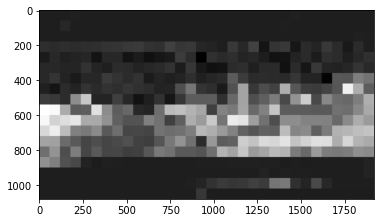

subset of alias values: [[ 2.1029255]
 [ 2.794464 ]
 [ 8.576798 ]
 [19.456932 ]
 [ 2.8540752]
 [ 2.5074651]
 [ 1.9181818]
 [ 2.077011 ]
 [ 2.4800766]
 [ 2.7896764]
 [ 3.083842 ]
 [ 3.3048415]
 [ 3.1704917]
 [ 3.505989 ]
 [ 3.5514662]
 [ 2.479889 ]
 [ 2.700981 ]
 [ 3.6029887]
 [ 2.528565 ]
 [ 2.3098402]]
subset of alias values: [[ 2.3714452]
 [ 2.3906374]
 [ 3.5844405]
 [ 8.138825 ]
 [25.707376 ]
 [ 2.6577635]
 [ 2.7120879]
 [ 2.1914616]
 [ 3.0212247]
 [ 2.6940968]
 [ 3.364134 ]
 [ 2.3119917]
 [ 3.325758 ]
 [ 3.352055 ]
 [75.20802  ]
 [ 3.179594 ]
 [ 2.730829 ]
 [ 3.2999234]
 [ 2.8480008]
 [ 3.3777282]]
subset of alias values: [[3.4633744]
 [3.533971 ]
 [3.8567805]
 [3.0870621]
 [4.1626797]
 [3.7656348]
 [3.7948208]
 [3.388159 ]
 [3.3333955]
 [3.952529 ]
 [2.9385614]
 [3.0126488]
 [3.7205815]
 [2.9396715]
 [2.745864 ]
 [9.43932  ]
 [2.9603095]
 [3.3785129]
 [3.0315878]
 [3.55004  ]]
subset of alias values: [[10.141057 ]
 [ 3.0368526]
 [ 3.263812 ]
 [ 2.5535743]
 [ 2.9943495]
 [ 3.532058

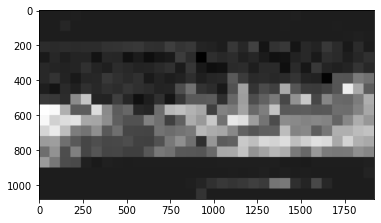

subset of alias values: [[ 2.043481 ]
 [ 3.4357097]
 [ 8.524073 ]
 [19.876577 ]
 [ 2.570391 ]
 [ 2.6122298]
 [ 2.2428567]
 [ 1.9163295]
 [ 2.4974754]
 [ 2.9314501]
 [ 2.370338 ]
 [ 2.7944932]
 [ 2.5182421]
 [ 2.8880308]
 [ 2.578797 ]
 [ 3.068445 ]
 [ 2.4456754]
 [ 2.7696502]
 [ 2.6584897]
 [ 2.4582412]]
subset of alias values: [[ 2.7804556]
 [ 2.1052058]
 [ 2.9068983]
 [ 7.2236314]
 [25.64901  ]
 [ 2.7654095]
 [ 2.5820014]
 [ 3.1429427]
 [ 3.1107147]
 [ 2.60294  ]
 [ 2.5005107]
 [ 2.2179375]
 [ 2.3846939]
 [ 2.5744445]
 [74.739944 ]
 [ 2.336574 ]
 [ 3.1145744]
 [ 2.5503533]
 [ 3.2073913]
 [ 3.1741564]]
subset of alias values: [[2.5478704]
 [3.0533876]
 [3.5153205]
 [2.9239864]
 [3.1706686]
 [3.4220636]
 [2.9155397]
 [3.6173398]
 [3.3220806]
 [3.30278  ]
 [3.26925  ]
 [3.4254432]
 [3.4472656]
 [3.2940152]
 [3.1475682]
 [9.60963  ]
 [3.0975149]
 [2.9211295]
 [2.8736424]
 [2.519713 ]]
subset of alias values: [[8.283824 ]
 [3.564921 ]
 [2.570352 ]
 [2.0524206]
 [3.0221667]
 [3.3721106]
 [5

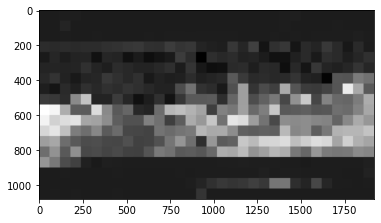

subset of alias values: [[ 2.3285637]
 [ 2.867813 ]
 [ 8.465459 ]
 [18.720135 ]
 [ 2.8263144]
 [ 2.1302109]
 [ 2.190727 ]
 [ 2.1583848]
 [ 2.662908 ]
 [ 3.119434 ]
 [ 3.0970087]
 [ 2.3037956]
 [ 3.4869158]
 [ 3.0473516]
 [ 2.5919373]
 [ 2.965188 ]
 [ 3.2196605]
 [ 2.7905548]
 [ 2.8999553]
 [ 2.4495325]]
subset of alias values: [[ 2.3419647]
 [ 2.3414738]
 [ 2.7920253]
 [ 8.071532 ]
 [25.642311 ]
 [ 2.8082387]
 [ 2.540285 ]
 [ 2.7573278]
 [ 3.1852784]
 [ 2.8544564]
 [ 2.8455865]
 [ 2.405336 ]
 [ 2.6213126]
 [ 2.6814263]
 [71.54589  ]
 [ 2.5354354]
 [ 3.6541994]
 [ 2.6784446]
 [ 2.9014647]
 [ 3.4005778]]
subset of alias values: [[ 3.126658 ]
 [ 3.4655697]
 [ 2.9000592]
 [ 3.9325788]
 [ 3.5651686]
 [ 3.8653038]
 [ 4.1182613]
 [ 3.8356314]
 [ 3.5052154]
 [ 4.3007255]
 [ 3.5480602]
 [ 3.1116877]
 [ 3.1490357]
 [ 3.4296567]
 [ 3.248696 ]
 [12.285685 ]
 [ 2.9398272]
 [ 3.3395925]
 [ 4.347878 ]
 [ 3.4573865]]
subset of alias values: [[8.399008 ]
 [2.8708425]
 [3.8139625]
 [2.770964 ]
 [3.29306

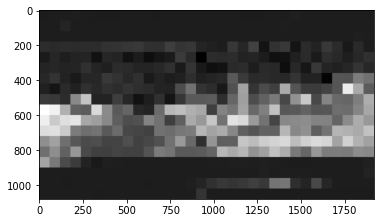

subset of alias values: [[ 1.9112777]
 [ 2.7273557]
 [ 9.143839 ]
 [19.989384 ]
 [ 2.7104676]
 [ 2.7465322]
 [ 2.2726316]
 [ 2.128621 ]
 [ 2.9338913]
 [ 2.108969 ]
 [ 2.5086563]
 [ 3.0472703]
 [ 2.8433683]
 [ 2.541653 ]
 [ 3.1474414]
 [ 2.4193172]
 [ 2.8575609]
 [ 3.4834967]
 [ 2.888737 ]
 [ 2.6034505]]
subset of alias values: [[ 3.9339533]
 [ 2.8633828]
 [ 3.2098763]
 [ 7.537803 ]
 [25.304386 ]
 [ 2.7139974]
 [ 2.9379709]
 [ 2.7739043]
 [ 3.5738378]
 [ 2.2619786]
 [ 2.08573  ]
 [ 3.1367776]
 [ 2.3266852]
 [ 2.8216953]
 [74.77382  ]
 [ 1.8463782]
 [ 2.433341 ]
 [ 3.006197 ]
 [ 2.3640327]
 [ 2.7373257]]
subset of alias values: [[ 2.8437533]
 [ 2.7477553]
 [ 2.5916271]
 [ 2.7694938]
 [ 2.8459802]
 [ 3.7285237]
 [ 3.8558514]
 [ 3.934596 ]
 [ 2.9855497]
 [ 2.8192208]
 [ 3.5386147]
 [ 3.0253012]
 [ 3.285928 ]
 [ 2.720724 ]
 [ 2.596848 ]
 [10.009196 ]
 [ 2.144312 ]
 [ 2.37326  ]
 [ 3.397081 ]
 [ 3.1034064]]
subset of alias values: [[8.627136 ]
 [2.660835 ]
 [2.3938684]
 [2.377067 ]
 [2.25572

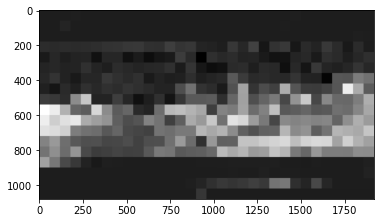

subset of alias values: [[ 2.1993246]
 [ 3.8941627]
 [ 8.764091 ]
 [17.882053 ]
 [ 2.427266 ]
 [ 2.9755023]
 [ 2.7942767]
 [ 2.5168571]
 [ 2.5746517]
 [ 3.149033 ]
 [ 3.278738 ]
 [ 2.5564206]
 [ 3.3086674]
 [ 3.076193 ]
 [ 2.8016567]
 [ 2.6979995]
 [ 3.5163987]
 [ 3.4419844]
 [ 3.1953404]
 [ 2.7695558]]
subset of alias values: [[ 2.7549121]
 [ 3.1123433]
 [ 3.809956 ]
 [ 7.3257747]
 [26.081522 ]
 [ 3.0959907]
 [ 2.6049962]
 [ 2.3592324]
 [ 3.582588 ]
 [ 2.2131786]
 [ 2.1766553]
 [ 2.3044658]
 [ 2.2125847]
 [ 3.0352998]
 [72.531654 ]
 [ 3.3280401]
 [ 3.448323 ]
 [ 3.4196336]
 [ 3.0345275]
 [ 2.9706712]]
subset of alias values: [[3.5034907]
 [3.2122111]
 [4.2869   ]
 [4.0199413]
 [3.6505265]
 [3.7342074]
 [3.4369888]
 [3.0821073]
 [3.6278203]
 [3.5633643]
 [3.8162532]
 [3.1883194]
 [3.2386897]
 [2.9779212]
 [3.7052023]
 [9.284259 ]
 [2.9295712]
 [3.246976 ]
 [3.4596143]
 [2.8719084]]
subset of alias values: [[9.893345 ]
 [3.0728266]
 [3.3710632]
 [2.9402285]
 [3.1237276]
 [2.782773 ]
 [5

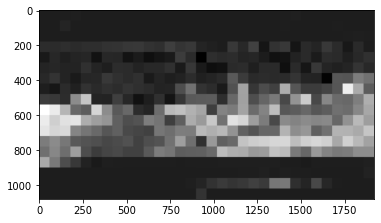

subset of alias values: [[ 2.674829 ]
 [ 2.928936 ]
 [ 9.378894 ]
 [19.45539  ]
 [ 2.6265612]
 [ 3.3264396]
 [ 2.9984543]
 [ 2.3567202]
 [ 3.1137042]
 [ 3.6754298]
 [ 2.822011 ]
 [ 3.2798522]
 [ 3.7014031]
 [ 3.402732 ]
 [ 2.7279377]
 [ 3.8697488]
 [ 2.6370397]
 [ 3.2078886]
 [ 2.8782673]
 [ 2.3907642]]
subset of alias values: [[ 2.880485 ]
 [ 2.396709 ]
 [ 3.4334219]
 [ 8.233061 ]
 [24.726946 ]
 [ 2.8418174]
 [ 2.6101146]
 [ 3.2273233]
 [ 4.007284 ]
 [ 2.5199614]
 [ 2.9672287]
 [ 2.8394105]
 [ 2.410491 ]
 [ 2.453742 ]
 [76.09247  ]
 [ 2.388262 ]
 [ 2.2635722]
 [ 2.574664 ]
 [ 2.6163805]
 [ 2.6620302]]
subset of alias values: [[2.9461002]
 [3.284262 ]
 [2.8479228]
 [3.4413614]
 [3.1764572]
 [3.4461267]
 [3.2596579]
 [2.289366 ]
 [3.5270119]
 [3.3524404]
 [3.0150406]
 [3.3425798]
 [3.2620707]
 [2.8091385]
 [2.6866076]
 [8.990712 ]
 [2.8277805]
 [2.6153145]
 [2.9961364]
 [2.8003716]]
subset of alias values: [[9.802556 ]
 [3.5592833]
 [2.3275917]
 [2.262092 ]
 [2.4382417]
 [3.1005225]
 [5

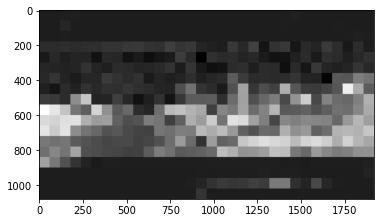

subset of alias values: [[ 3.1346574]
 [ 3.6644008]
 [ 8.398171 ]
 [20.30996  ]
 [ 2.3601308]
 [ 3.457094 ]
 [ 3.0580945]
 [ 3.4397736]
 [ 2.2824662]
 [ 2.950788 ]
 [ 3.3083038]
 [ 2.6372933]
 [ 3.258604 ]
 [ 2.6170962]
 [ 3.6746004]
 [ 3.3187745]
 [ 3.69592  ]
 [ 3.0028903]
 [ 3.3522143]
 [ 2.8824546]]
subset of alias values: [[ 3.3589616]
 [ 3.0517802]
 [ 3.8330843]
 [ 8.587599 ]
 [25.65762  ]
 [ 2.7346315]
 [ 3.408902 ]
 [ 3.8491018]
 [ 3.278486 ]
 [ 2.6699455]
 [ 2.7709422]
 [ 2.8569105]
 [ 3.076758 ]
 [ 3.0824366]
 [73.58484  ]
 [ 2.8751018]
 [ 3.0905254]
 [ 3.1290433]
 [ 3.2286742]
 [ 2.8684695]]
subset of alias values: [[ 2.9276667]
 [ 3.153434 ]
 [ 3.6978981]
 [ 3.7288587]
 [ 4.182289 ]
 [ 3.5090475]
 [ 3.3671134]
 [ 3.4283593]
 [ 3.913605 ]
 [ 3.3610933]
 [ 3.5927744]
 [ 3.393802 ]
 [ 3.7243648]
 [ 3.318204 ]
 [ 3.44475  ]
 [12.045663 ]
 [ 3.16046  ]
 [ 3.5709655]
 [ 3.9304945]
 [ 3.29957  ]]
subset of alias values: [[9.367899 ]
 [2.9601264]
 [3.5595176]
 [2.6274424]
 [2.96217

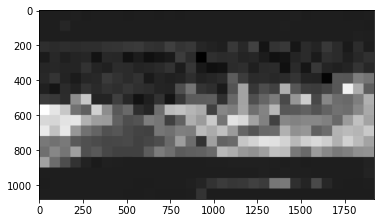

subset of alias values: [[ 2.9837556]
 [ 2.676891 ]
 [ 8.411955 ]
 [19.02859  ]
 [ 2.8524585]
 [ 2.674139 ]
 [ 3.006002 ]
 [ 2.6442175]
 [ 2.5760512]
 [ 2.9740815]
 [ 2.7122443]
 [ 2.9774842]
 [ 3.298722 ]
 [ 3.4490542]
 [ 2.757021 ]
 [ 3.017563 ]
 [ 2.7937174]
 [ 2.762503 ]
 [ 2.5117285]
 [ 3.0309818]]
subset of alias values: [[ 3.2116783]
 [ 3.18042  ]
 [ 3.1284535]
 [ 7.76902  ]
 [25.039387 ]
 [ 3.5216846]
 [ 2.4320323]
 [ 3.354894 ]
 [ 3.3998384]
 [ 2.6020014]
 [ 2.422941 ]
 [ 2.9835901]
 [ 2.8455293]
 [ 3.0488899]
 [72.7388   ]
 [ 3.1423006]
 [ 2.8514514]
 [ 4.0452337]
 [ 3.378632 ]
 [ 3.2013075]]
subset of alias values: [[3.6015508]
 [3.4192247]
 [3.2906718]
 [3.3520854]
 [3.625325 ]
 [3.9046535]
 [3.40648  ]
 [4.6983724]
 [3.5628314]
 [3.200135 ]
 [3.468832 ]
 [3.7175593]
 [3.1121292]
 [3.1357107]
 [3.860049 ]
 [9.418427 ]
 [4.2290053]
 [3.642025 ]
 [3.2362733]
 [4.111579 ]]
subset of alias values: [[9.979346 ]
 [3.1341798]
 [3.3523731]
 [2.9755695]
 [3.5211089]
 [3.5423212]
 [6

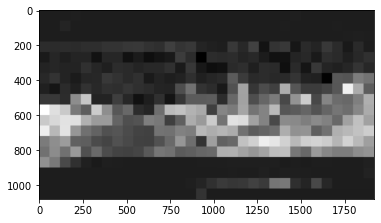

subset of alias values: [[ 1.8760163]
 [ 3.1164117]
 [10.462815 ]
 [18.661121 ]
 [ 2.3064885]
 [ 2.291265 ]
 [ 2.2355607]
 [ 2.8211074]
 [ 2.8371851]
 [ 2.8414276]
 [ 2.5324578]
 [ 2.8066347]
 [ 2.7381248]
 [ 3.125035 ]
 [ 2.7143607]
 [ 2.3206055]
 [ 2.5127773]
 [ 2.5801716]
 [ 3.712201 ]
 [ 2.9665816]]
subset of alias values: [[ 2.6250265]
 [ 2.6329281]
 [ 3.1160648]
 [ 7.0805926]
 [24.046705 ]
 [ 2.439956 ]
 [ 2.913443 ]
 [ 2.1010818]
 [ 3.3438358]
 [ 2.4516728]
 [ 2.0928311]
 [ 2.218014 ]
 [ 2.6122425]
 [ 3.533113 ]
 [74.01244  ]
 [ 3.5822475]
 [ 3.1493938]
 [ 3.007715 ]
 [ 4.3030076]
 [ 2.9406369]]
subset of alias values: [[ 3.201269 ]
 [ 3.7941809]
 [ 4.402844 ]
 [ 3.125865 ]
 [ 3.3661635]
 [ 3.4082391]
 [ 3.7403193]
 [ 3.7058027]
 [ 3.221705 ]
 [ 3.7351816]
 [ 3.2024386]
 [ 3.1050775]
 [ 3.3472257]
 [ 3.6378126]
 [ 3.0367992]
 [11.009964 ]
 [ 3.0874386]
 [ 3.386705 ]
 [ 2.6604729]
 [ 3.6277025]]
subset of alias values: [[8.960978 ]
 [3.6082802]
 [3.205348 ]
 [2.6939468]
 [3.04168

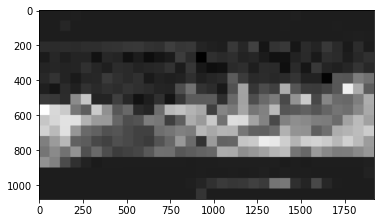

subset of alias values: [[ 2.594614 ]
 [ 3.7863615]
 [ 8.847161 ]
 [18.52109  ]
 [ 3.3011444]
 [ 3.186486 ]
 [ 3.205473 ]
 [ 3.498828 ]
 [ 2.6168482]
 [ 2.447156 ]
 [ 3.700126 ]
 [ 3.6025953]
 [ 3.3310218]
 [ 4.072358 ]
 [ 3.5450087]
 [ 3.3921466]
 [ 2.732974 ]
 [ 3.4639492]
 [ 3.6127226]
 [ 2.7911503]]
subset of alias values: [[ 3.7187047]
 [ 2.6465735]
 [ 4.5092254]
 [ 7.9824347]
 [24.718243 ]
 [ 2.7969322]
 [ 3.2151284]
 [ 3.0688066]
 [ 4.2038245]
 [ 2.9817767]
 [ 3.1663306]
 [ 3.2395658]
 [ 2.4273438]
 [ 2.6614628]
 [75.154045 ]
 [ 3.0505826]
 [ 3.4454231]
 [ 3.2760482]
 [ 2.6261828]
 [ 3.0899901]]
subset of alias values: [[ 3.3661757]
 [ 2.8552544]
 [ 2.5957935]
 [ 3.4385724]
 [ 3.4877572]
 [ 4.27508  ]
 [ 4.1994734]
 [ 3.3049173]
 [ 3.9062743]
 [ 3.9185038]
 [ 3.8611045]
 [ 2.606495 ]
 [ 3.3135138]
 [ 3.7454362]
 [ 2.7914648]
 [11.831709 ]
 [ 2.9474986]
 [ 3.3323762]
 [ 2.8481715]
 [ 3.1044583]]
subset of alias values: [[10.17225  ]
 [ 3.632682 ]
 [ 2.5437484]
 [ 3.3687112]
 [ 3.

KeyboardInterrupt: 

In [13]:



grayscale_images = []

for img in images:
    grayscale_image = create_grayscale_img(img)
    plt.imshow(grayscale_image, cmap="gray")
    plt.show()
    grayscale_images.append(grayscale_image)
